In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [8]:
for i in df.columns:
    if df[i].dtypes==object:
        print(df[i].unique())
        df[i]=LE.fit_transform(df[i])
        print(df[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 156    8  662 ... 1323 1524 1519]
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
[1 2 3 0 4]
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
[9 3 0 1 5 7 2 8 6 4]
['Medium' nan 'High' 'Small']
[1 3 0 2]
['Tier 1' 'Tier 3' 'Tier 2']
[0 2 1]
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
[1 2 0 3]


# Dsecriptive Statistics

In [9]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.736360,1.112871,1.201220,2181.288914
std,449.222377,4.643456,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.989181,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,8.773750,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.600000,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.850000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


# Exploring Data Variables

In [10]:
pd.set_option('display.max_rows',None)
df['Item_Outlet_Sales'].value_counts()

958.7520      17
1342.2528     16
1845.5976     15
703.0848      15
1278.3360     14
1230.3984     14
1416.8224     13
1438.1280     12
759.0120      12
575.2512      12
1211.7560     12
539.2980      12
852.2240      11
1537.9980     11
1701.7848     11
639.1680      11
679.1160      11
2109.2544     11
2277.0360     11
1406.1696     11
1304.9680     11
2696.4900     10
1470.0864     10
1006.6896     10
2117.2440     10
2956.1520     10
1821.6288     10
2348.9424     10
918.8040      10
1677.8160     10
452.7440      10
2759.0752     10
1518.0240     10
1571.2880     10
527.3136      10
3020.0688     10
3415.5540     10
223.7088      10
1737.7380      9
1713.7692      9
1869.5664      9
1693.7952      9
671.1264       9
1225.0720      9
2157.1920      9
1298.3100      9
447.4176       9
755.0172       9
3691.1952      9
790.9704       9
2684.5056      9
1565.9616      9
2302.3364      9
2450.1440      9
2013.3792      9
1757.7120      9
3435.5280      9
343.5528       8
2059.9852     

In [11]:
# As we have continuos values in sales column, so, this is a regression problem.

# To check missing Values

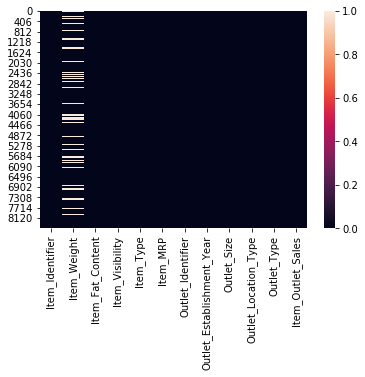

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
7          NaN
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
18         NaN
19      13.350
20      18.850
21         NaN
22      14.600
23         NaN
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
29         NaN
30      19.250
31      18.600
32      18.700
33      17.850
34      17.500
35      10.000
36         NaN
37       8.850
38         NaN
39         NaN
40      13.350
41       9.800
42      13.600
43      21.350
44      12.150
45       6.420
46      19.600
47      10.000
48      15.850
49         NaN
50       7.390
51      10.195
52       9.895
53      10.895
54      12.150
55       7.905
56       9.195
57       8.365
58      15.100
59         NaN
60      10.000
61       7.970
62         NaN
63         NaN
64         NaN
65      17.700
66      19

In [15]:
df['Item_Weight'].median()

12.6

In [16]:
if df['Item_Weight'].mean()>df['Item_Weight'].median():
    print("Replace null values by mean")
    df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
else:
    print("Replace null values by median")
    df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())
    

Replace null values by mean


In [17]:
df['Item_Weight'].isnull().sum()

0

In [18]:
dfcor=df.corr()
dfcor

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.000855,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.015096,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.004795,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,0.000855,-0.015096,-0.004795,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367


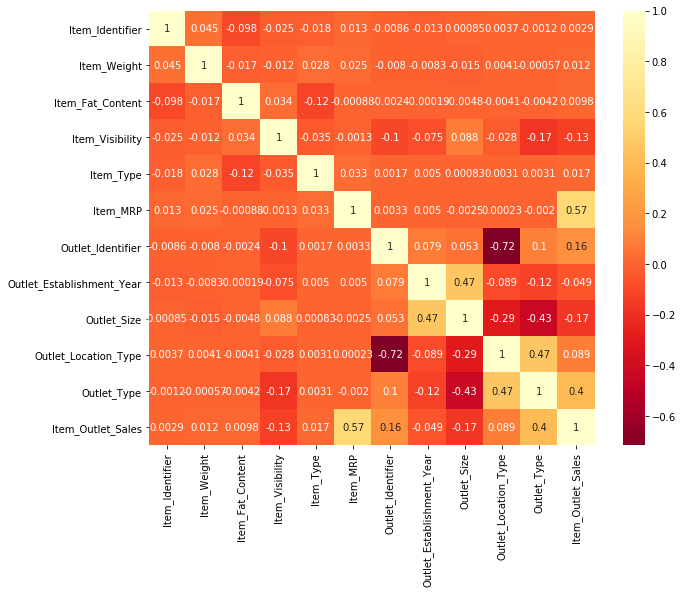

In [19]:
# Multivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Item_Identifier                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
Item_Weight                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Item_Fat_Content             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Item_Visibility              AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Item_Type                       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Item_MRP                     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Outlet_Identifier            AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Outlet_Size                        AxesSubplot(0.125,0.125;0.168478x0.222059)
Outlet_Location_Type            AxesSubplot(0.327174,0.125;0.168478x0.222059)
Outlet_Type                     AxesSubplot(0.529348,0.125;0.168478x0.222059)
Item_Outlet_Sales               AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

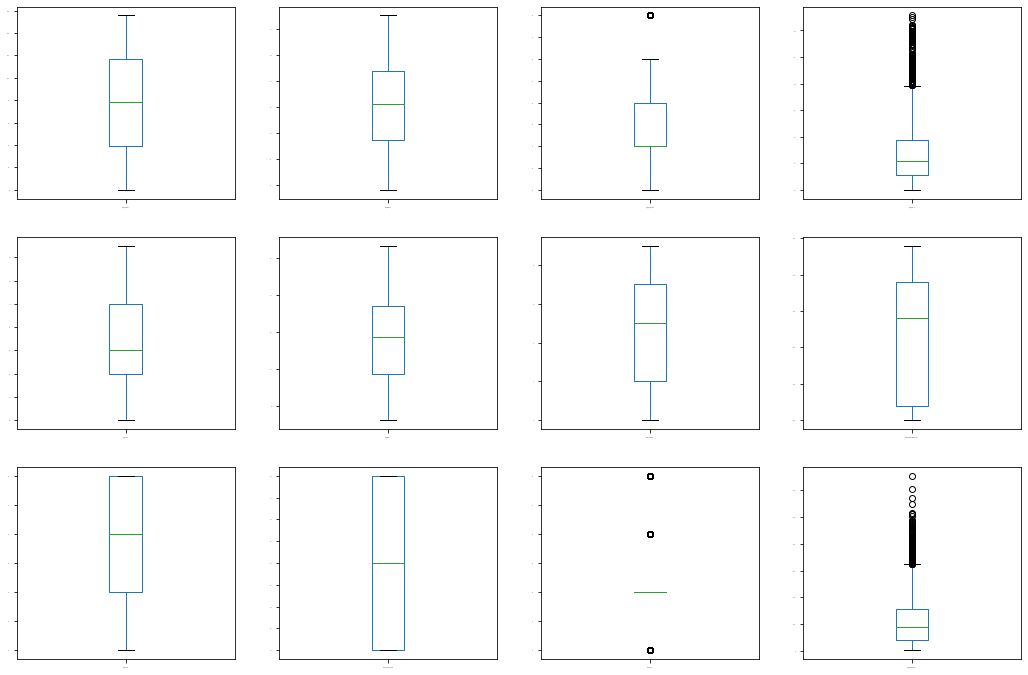

In [20]:
df.plot(kind='box',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.38851383, 0.84187169, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.64170589, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.09855449, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.53424315, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.33644372, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.45963367, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [22]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [23]:
df_new.shape

(8222, 12)

In [24]:
df.shape

(8523, 12)

In [25]:
# 301 rows are removed as outliers

In [26]:
((8523-8222)/8523)*100

3.5316203214830457

In [27]:
df=df_new

In [28]:
df.shape

(8222, 12)

# To check skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE92F37108>,
      dtype=object)

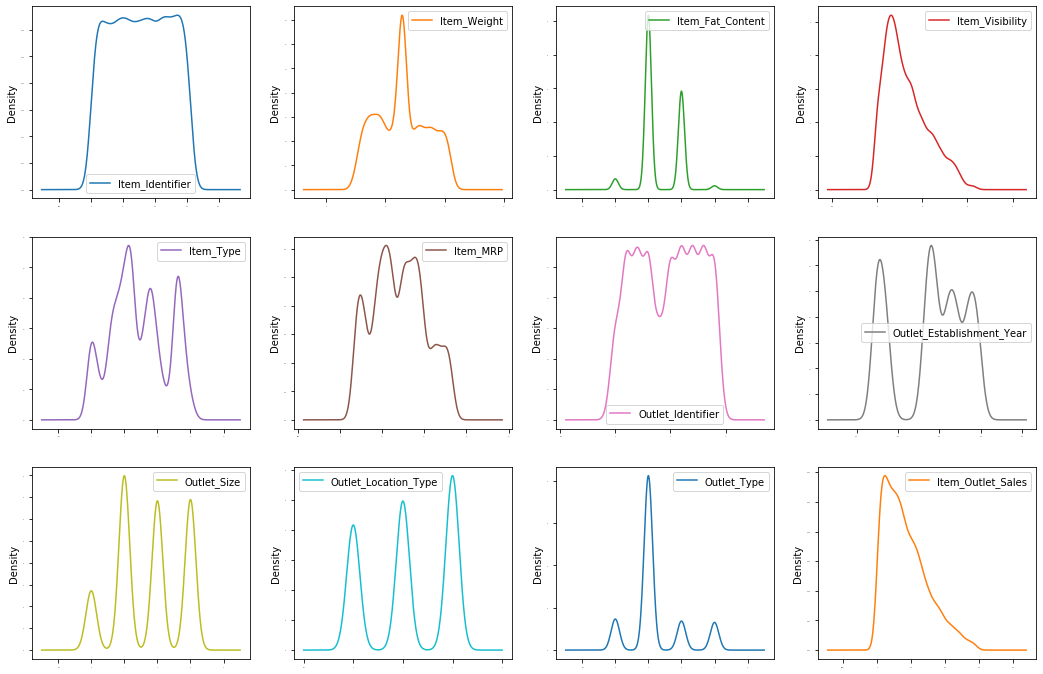

In [29]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

In [30]:
df.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.131316
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [31]:
list=['Item_Visibility','Outlet_Type']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [32]:
df.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility             -0.244803
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.131316
Outlet_Location_Type        -0.202794
Outlet_Type                 -0.841162
Item_Outlet_Sales            0.877476
dtype: float64

In [33]:
x=df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
y=df['Item_Outlet_Sales']

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [35]:
x=pd.DataFrame(x)

In [36]:
x.columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [37]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.530468530310763
error:
Mean absolute error: 820.3325377663972
Mean squared error: 1145935.131360125
Root Mean squared error: 1070.4835969598623
0.5425798828128712
error:
Mean absolute error: 819.220324843579
Mean squared error: 1163879.711368707
Root Mean squared error: 1078.8325687374788
0.5204235241638209
error:
Mean absolute error: 853.8656684365317
Mean squared error: 1248146.8998679763
Root Mean squared error: 1117.2049498046347
0.546930835920668
error:
Mean absolute error: 838.683358076304
Mean squared error: 1191637.0887329776
Root Mean squared error: 1091.6213119635297
0.5192994476846282
error:
Mean absolute error: 831.1613313425777
Mean squared error: 1200792.0935181032
Root Mean squared error: 1095.8065949418735
0.5680639883733212
error:
Mean absolute error: 798.4234268246893
Mean squared error: 1094132.6834307099
Root Mean squared error: 1046.0079748408757
0.5181243168913264
error:
Mean absolute error: 814.0555936427338
Mean squared error: 1119374.2377666323
Root Mean squa

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=6)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.5680639883733212
error:
Mean absolute error: 798.4234268246893
Mean squared error: 1094132.6834307099
Root Mean squared error: 1046.0079748408757


In [40]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))


0.16972195463469142
error:
Mean absolute error: 1026.4442430071863
Mean squared error: 2103168.805832998
Root Mean squared error: 1450.2306043636638


In [41]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))


0.5155511215246524
error:
Mean absolute error: 804.6923576561637
Mean squared error: 1227152.4881545464
Root Mean squared error: 1107.7691493061839


In [42]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))


0.06541244520160183
error:
Mean absolute error: 1179.744757841781
Mean squared error: 2367394.1549386615
Root Mean squared error: 1538.63385993506


In [43]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [44]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred=rd.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.5680639877507145
error:
Mean absolute error: 798.4234269438051
Mean squared error: 1094132.6850078285
Root Mean squared error: 1046.0079755947506


In [45]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.5680639821544418
error:
Mean absolute error: 798.4234283972294
Mean squared error: 1094132.6991836897
Root Mean squared error: 1046.0079823709232


In [46]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
pred=el.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.5680619841781198
error:
Mean absolute error: 798.4238100023264
Mean squared error: 1094137.7602370307
Root Mean squared error: 1046.0104015912225


In [47]:
# Ensembler Techniques

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))


0.5863444154834625
error:
Mean absolute error: 738.1280107650636
Mean squared error: 1047826.7209040999
Root Mean squared error: 1023.6340756853007


In [48]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2score=r2_score(y_test,predad)
print(r2_score(y_test,predad))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predad))
print('Mean squared error:',mean_squared_error(y_test,predad))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predad)))



0.6068597673490521
error:
Mean absolute error: 752.1149036252859
Mean squared error: 995859.4933888742
Root Mean squared error: 997.9275992720485


In [49]:
from sklearn.model_selection import cross_val_score
adscores=cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.56528822 0.54207895 0.53634249 0.56796056 0.5507675 ]
0.5524875446861001 0.012451760806679299


In [50]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.55179567 0.52541646 0.51375536 0.54921378 0.54398108]
0.5368324684674229 0.014772778602568424


In [51]:
list1=[0.60032354,0.5891261692047842]
list2=[0.5472193172570087,0.5361871687458362]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)


[0.053104222742991314, 0.05293900045894806]


In [52]:
rf=RandomForestRegressor()
grid_param={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'n_estimators':[50,100]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [54]:
gd_sr.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 50}

In [55]:
rf=RandomForestRegressor(criterion='mse',max_features='auto', n_estimators= 50)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))


0.5928592721500929
error:
Mean absolute error: 734.4012642741848
Mean squared error: 1031324.0042633127
Root Mean squared error: 1015.5412371062598
